In [1]:
#Importar librerias

import numpy as np
import pandas as pd
import sklearn
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#pip install imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Iniciarlizar tiempo para calculo de demora
start_time = time.time()

#Importar data
data = pd.read_csv('./data/CancelacionInfo.csv')

#Extraer features
features = np.array(data[['ReservationMonth','ChannelCode','TypeRoom', 'LeadTime', 'NumberRooms', 'NumNights', 'RoomRate']])

#Extraer variable dependiente
labels = np.array(data[['IsCancel?']])

#Divicion de informacion en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.3,
    random_state=42,
)


#hacer Oversample data (clase minoritaria)
#sm = SMOTE(random_state=12, ratio = 1.0)
#x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#Iniciarlizar modelo clasificador
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Entrenar modelo
clf.fit(X_train, y_train)

#Calculo de la eficiencia con data de prueba
score = clf.score(X_test, y_test)

#Calculo prediccion de prueba
Y_predict = clf.predict(X_test)

In [4]:
print("Tiempo de demora validacion simple : %s segundos" % (time.time() - start_time))
print("Eficiencia: ", str(score * 100), "%")
print("")
[validacion1, validacion2, validacion3]  = cross_val_score(clf, features, labels)
print("Tiempo de demora validacion cruzada :%s segundos" % (time.time() - start_time))
print("Eficiencia cruzada 1 : ", str(validacion1 * 100), "%")
print("Eficiencia cruzada 2 : ", str(validacion2 * 100), "%")
print("Eficiencia cruzada 3 : ", str(validacion3 * 100), "%")

Tiempo de demora validacion simple : 0.22216200828552246 segundos
Eficiencia:  66.44993498049415 %

Tiempo de demora validacion cruzada :0.7731308937072754 segundos
Eficiencia cruzada 1 :  63.1578947368421 %
Eficiencia cruzada 2 :  61.1957796014068 %
Eficiencia cruzada 3 :  68.2297772567409 %


In [5]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1792, 7)
X_test:  (769, 7)
y_train:  (1792, 1)
y_test:  (769, 1)


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_predict)
print(confusion_matrix)

[[131 160]
 [ 98 380]]


Text(0.5, 257.44, 'Predicted label')

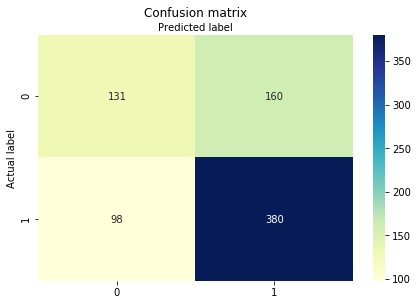

In [7]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Accuracy: ",metrics.accuracy_score(y_test, Y_predict))
print("Precision: ",metrics.precision_score(y_test, Y_predict))
print("Recall: ",metrics.recall_score(y_test, Y_predict))
print("f-score: ",metrics.f1_score(y_test, Y_predict))
print("")
print("Blanced Accuracy: ",metrics.balanced_accuracy_score(y_test, Y_predict))
print("Average Precision: ",metrics.average_precision_score(y_test, Y_predict))
print("Accuracy (count): ",metrics.accuracy_score(y_test, Y_predict, normalize=False))

Accuracy:  0.6644993498049415
Precision:  0.7037037037037037
Recall:  0.7949790794979079
f-score:  0.7465618860510806

Blanced Accuracy:  0.6225754504018749
Average Precision:  0.6868679540790799
Accuracy (count):  511


In [9]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50       291
           1       0.70      0.79      0.75       478

   micro avg       0.66      0.66      0.66       769
   macro avg       0.64      0.62      0.63       769
weighted avg       0.65      0.66      0.65       769



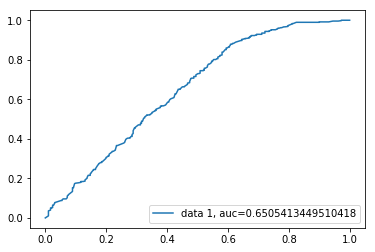

In [10]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [11]:
#Perform the training using KFolds cross validation method

cv_r2_scores_rf = cross_val_score(clf, X_test, np.ravel(y_test), cv=10, scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[-0.95       -0.10632184 -0.60416667 -0.21695402 -0.43821839 -0.32758621
 -0.16163793 -0.27227011 -0.39398386 -0.84005869]
Mean 5-Fold R Squared: -0.4311197725605278


In [13]:
# Scoring model on testing data (k=10)

scores = cross_val_score(clf,X_test, np.ravel(y_test),cv=10)

print("Tiempo de demora validacion cruzada : %s segundos" % (time.time() - start_time))
print("")
print('Model Score:',score)
print("")
print('Cross Validated Score 10 Fold:',scores)
print("")
print('Cross Validated MEAN Score 10 Fold:',scores.mean())
print('Cross Validated MEAN Score 10 Fold:',scores.mean()*100)
print("")
print('Cross Validated STD Score 10 Fold:',scores.std())
print('Cross Validated STD Score 10 Fold:',scores.std()*100)
print("")
print("The mean score and the 95% confidence interval of the score estimate are hence given by:")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Tiempo de demora validacion cruzada : 689.2745361328125 segundos

Model Score: 0.6644993498049415

Cross Validated Score 10 Fold: [0.53846154 0.75324675 0.5974026  0.66233766 0.66233766 0.62337662
 0.72727273 0.7012987  0.64473684 0.55263158]

Cross Validated MEAN Score 10 Fold: 0.6463102686786897
Cross Validated MEAN Score 10 Fold: 64.63102686786897

Cross Validated STD Score 10 Fold: 0.06697406023026688
Cross Validated STD Score 10 Fold: 6.697406023026688

The mean score and the 95% confidence interval of the score estimate are hence given by:
Accuracy: 0.65 (+/- 0.13)
